# Setup Fastai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Create Path to Dataset

In [3]:
path = Path('data')

In [4]:
path.ls()

[PosixPath('data/paper'),
 PosixPath('data/.DS_Store'),
 PosixPath('data/metal'),
 PosixPath('data/cardboard'),
 PosixPath('data/trash'),
 PosixPath('data/glass'),
 PosixPath('data/plastic')]

## Create Fastai Dataset

In [5]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [6]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

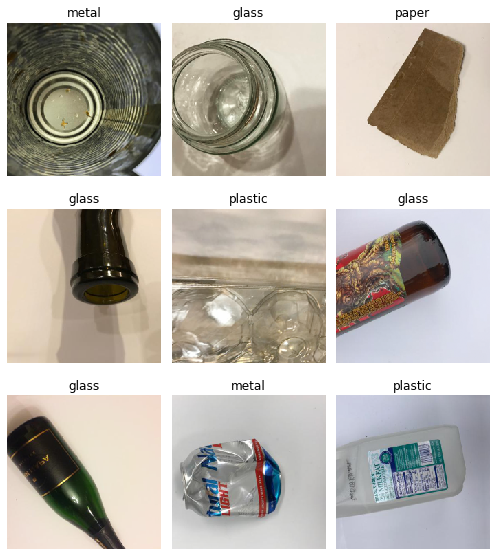

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], 6, 1984, 495)

# Train CNN Model (1st stage)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [10]:
learn.save('stage-1')

## Find Optimal Learning Rate

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


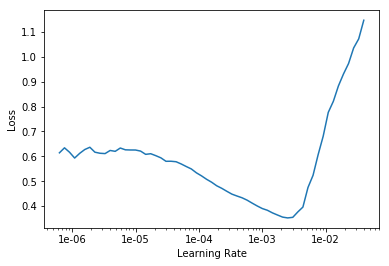

In [13]:
learn.recorder.plot()

# Retrain Model with new Learning Rate (2nd stage)

In [15]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.262227,0.940532,0.285714,00:05
1,0.251039,0.884200,0.259740,00:05
2,0.202748,0.818391,0.194805,00:05
3,0.171218,0.883062,0.259740,00:05
4,0.142285,0.818760,0.220779,00:05
5,0.122827,0.829514,0.194805,00:05
6,0.107282,0.856356,0.207792,00:05
7,0.096034,0.853697,0.246753,00:05
8,0.088041,0.817168,0.207792,00:05
9,0.080346,0.805308,0.207792,00:05


In [16]:
learn.save('stage-2')

# Interpret and Analyze Model

In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

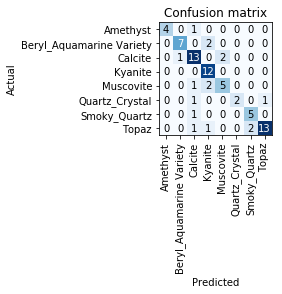

In [19]:
interp.plot_confusion_matrix()

# Test Model with Example Test Image

In [22]:
learn.export()

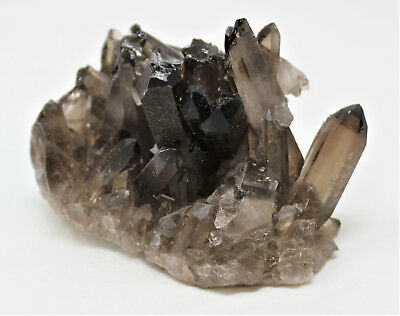

In [20]:
test_img = open_image('./test_data/smoky_q.jpg')
test_img

In [23]:
learn = load_learner(path)

In [25]:
pred_class,pred_idx,outputs = learn.predict(test_img)
pred_class

Category Smoky_Quartz

## Success! :)